In [70]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
train_raw=pd.read_csv("Gotem_Pumpkins.csv")
test_raw=pd.read_csv("Freyja_Pumpkins.csv")
#print(train_raw) #prints the df
train=train_raw.dropna()
#train = train_raw.dropna().copy()
test=test_raw.dropna()
#print(train) #prints the cleaned df
print (train)

      Unnamed: 0    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0              0   84930   1204.448           508.7883           213.0266   
1              1  103343   1275.261           521.4694           252.8941   
2              2   98350   1269.539           526.2346           238.4702   
3              3   69517   1059.538           429.8407           206.8250   
4              4   80011   1182.947           501.9065           204.7531   
...          ...     ...        ...                ...                ...   
1995        1995   68292    982.052           368.6867           237.1654   
1996        1996   82272   1121.769           459.4482           228.2780   
1997        1997   72049   1023.784           398.3945           230.5932   
1998        1998   73703   1065.980           422.3591           223.3923   
1999        1999   74525   1153.205           478.0779           200.0458   

      Convex_Area  Equiv_Diameter  Eccentricity  Solidity  Extent  Roundnes

In [72]:
# encoding the strings with numbers
train.loc[:, 'Class'] = pd.factorize(train['Class'])[0]

test.loc[:, 'Class'] = pd.factorize(test['Class'])[0]

In [73]:
# separwating x n y
x= train.iloc[:, 1:-1] # : indicates all rows, and next start:stop
y= train.iloc[:, -1:]
x_test= test.iloc[:, 1:-1]
y_test= test.iloc[:, -1:]

print (x)
print (y)

# Standardize training data
x_train_mean = x.mean(axis=0)
x_train_std = x.std(axis=0)

x = (x - x_train_mean) / x_train_std #had written the code below already, so instead of a new variable, eidting x itself

# Use the same mean and std for test data
x_test = (x_test - x_train_mean) / x_train_std


        Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0      84930   1204.448           508.7883           213.0266        85665   
1     103343   1275.261           521.4694           252.8941       104156   
2      98350   1269.539           526.2346           238.4702        99184   
3      69517   1059.538           429.8407           206.8250        70493   
4      80011   1182.947           501.9065           204.7531        80902   
...      ...        ...                ...                ...          ...   
1995   68292    982.052           368.6867           237.1654        68891   
1996   82272   1121.769           459.4482           228.2780        82865   
1997   72049   1023.784           398.3945           230.5932        72732   
1998   73703   1065.980           422.3591           223.3923        74461   
1999   74525   1153.205           478.0779           200.0458        76573   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness

In [74]:
n=len(x)
m=len(x.columns)
itr=1000
rate=0.001
w=np.zeros((m,1)) # an array
b=np.zeros((n,1))
z=np.zeros((n,1))
y_pred=np.zeros((n,1))

x = x.to_numpy()  # Convert x to NumPy array
y = y.to_numpy()  # Convert y to NumPy array
# np.dot does not automatically handle Pandas DataFrames, so you need to convert them to NumPy arrays explicitly.

In [75]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

In [76]:
# gradient descent and cost/error
def grad_desc(n,itr,rate,x,y,w,b,z ,y_pred,cost_list):
    cost = 0.0
    sig_list=np.zeros((n,1))
    dL=(1/n)*np.matmul(x.T , (y_pred-y))
    w=w-rate*dL
    b=b-rate*(1/n)*np.sum(y-y_pred)
    for j in range(n):
      z[j] = np.dot(x[j],w)
      #print (z[j])
    sig_list=sigmoid(z)
    #for j in range(n)
    y_pred = np.array([1 if value >= 0.5 else 0 for value in sig_list]).reshape(-1,1)
    cost = cost+ -np.dot(y.T,np.log(sig_list)) - np.dot((1-y).T,np.log(1-sig_list))
    cost = cost/n
    cost_list.append(cost)
    return (z,sig_list,y,y_pred,cost_list)

In [77]:
'''print (x)
print (y)
'''
cost_list=[]
for p in range (itr):
  z, sig_list,y ,y_pred,cost_list=grad_desc(n,itr,rate,x,y,w,b,z, y_pred,cost_list)

y_pred_test=np.zeros((len(x_test),1))

for k in range (n):
  print ('z:',z[k], "\t sigmoid:",sig_list[k],'\t targe:',y[k], "\t predicted:",y_pred[k])

print ("cost final:",cost_list[-1][0][0])

z: [-0.00012974] 	 sigmoid: [0.49996756] 	 targe: [0] 	 predicted: [0]
z: [0.00201718] 	 sigmoid: [0.5005043] 	 targe: [0] 	 predicted: [1]
z: [0.00131448] 	 sigmoid: [0.50032862] 	 targe: [0] 	 predicted: [1]
z: [-0.00115214] 	 sigmoid: [0.49971196] 	 targe: [1] 	 predicted: [0]
z: [-0.00054086] 	 sigmoid: [0.49986478] 	 targe: [0] 	 predicted: [0]
z: [-0.00120356] 	 sigmoid: [0.49969911] 	 targe: [1] 	 predicted: [0]
z: [0.0011559] 	 sigmoid: [0.50028898] 	 targe: [1] 	 predicted: [1]
z: [-0.00066531] 	 sigmoid: [0.49983367] 	 targe: [1] 	 predicted: [0]
z: [0.00237182] 	 sigmoid: [0.50059295] 	 targe: [1] 	 predicted: [1]
z: [-0.00209609] 	 sigmoid: [0.49947598] 	 targe: [1] 	 predicted: [0]
z: [-0.00228205] 	 sigmoid: [0.49942949] 	 targe: [0] 	 predicted: [0]
z: [0.00102757] 	 sigmoid: [0.50025689] 	 targe: [0] 	 predicted: [1]
z: [-8.46841143e-05] 	 sigmoid: [0.49997883] 	 targe: [0] 	 predicted: [0]
z: [0.00310748] 	 sigmoid: [0.50077687] 	 targe: [0] 	 predicted: [1]
z: [0.0007

In [78]:
#trying
'''lst=[]
ary=[-10,-8,-5,-3.5,-2,-1,-0.9,-0.5,-0.1,0,0.1,0.5,0.9,1,3,5,7,10]
for i in range(0,len(ary)):
  lst.append(sigmoid(ary[i]))

for i in range (0,len(ary)):
  print (ary[i],lst[i])

plt.plot(ary,lst, label="sigmoid", color="blue")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.legend()
plt.show()'''

'lst=[]\nary=[-10,-8,-5,-3.5,-2,-1,-0.9,-0.5,-0.1,0,0.1,0.5,0.9,1,3,5,7,10]\nfor i in range(0,len(ary)):\n  lst.append(sigmoid(ary[i]))\n\nfor i in range (0,len(ary)):\n  print (ary[i],lst[i]) \n\nplt.plot(ary,lst, label="sigmoid", color="blue")\nplt.xlabel("z")\nplt.ylabel("sigmoid(z)")\nplt.legend()\nplt.show()'

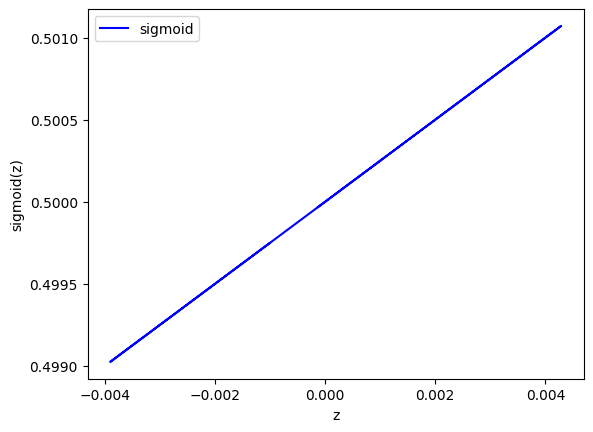

In [79]:
plt.plot(z,sig_list, label="sigmoid", color="blue")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.legend()
plt.show()

In [80]:
lst=[]
#print (cost_list)
for i in range(len(cost_list)):
  cost_list[i]=cost_list[i][0][0]
  lst.append(i)

#print (cost_list)

#In the grad_desc function, the calculation of cost involves NumPy operations
#Here, np.dot() returns a NumPy array rather than a scalar. When you append cost to cost_list
#Here, np.dot() returns a NumPy array rather than a scalar. When you append cost to cost_list

In [81]:
for i in range (itr):
  if (i%(itr/10)==0):
    print (lst[i],":\t",cost_list[i])

0 :	 0.6924667218127886
100 :	 0.6923781058933062
200 :	 0.6923781058933062
300 :	 0.6923781058933062
400 :	 0.6923781058933062
500 :	 0.6923781058933062
600 :	 0.6923781058933062
700 :	 0.6923781058933062
800 :	 0.6923781058933062
900 :	 0.6923781058933062


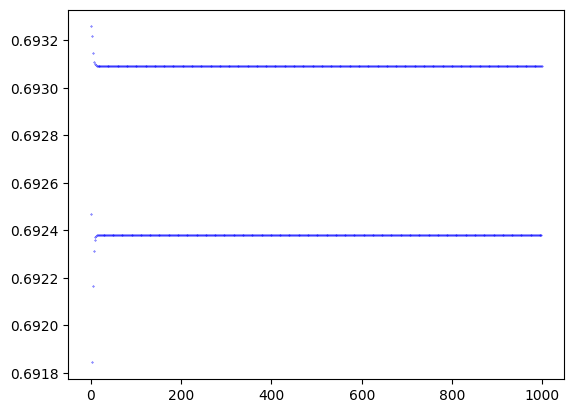

In [86]:
plt.scatter(lst,cost_list, label="cost",color="blue",s=0.1)
plt.xlabel("itr")
plt.ylabel("cost")
plt.title("Learning Curve")
plt.legend()
plt.show()